In [1]:
train_dataset_file_path = 'water_potability.csv'

In [2]:
import pandas as pd
import numpy as np
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [138]:
#import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# 1. Dataset Exploration

In [4]:
df = pd.read_csv(train_dataset_file_path)

In [5]:
#get an overview of the dataset
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Target class counts

In [6]:
df[['Potability']].value_counts()

Potability
0             1998
1             1278
dtype: int64

Dataset size

In [7]:
len(df)

3276

General dataset description

In [8]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [9]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

Correlation between features

In [10]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

def plot_corr(corr):
  ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap="Blues",
    square=True,
    annot = True

  )
  ax.set_xticklabels(
    ax.get_xticklabels(),
    size = 15,
    rotation=45,
    horizontalalignment='right'
  );
  ax.set_yticklabels(
    ax.get_xticklabels(),
    size = 15,
  );


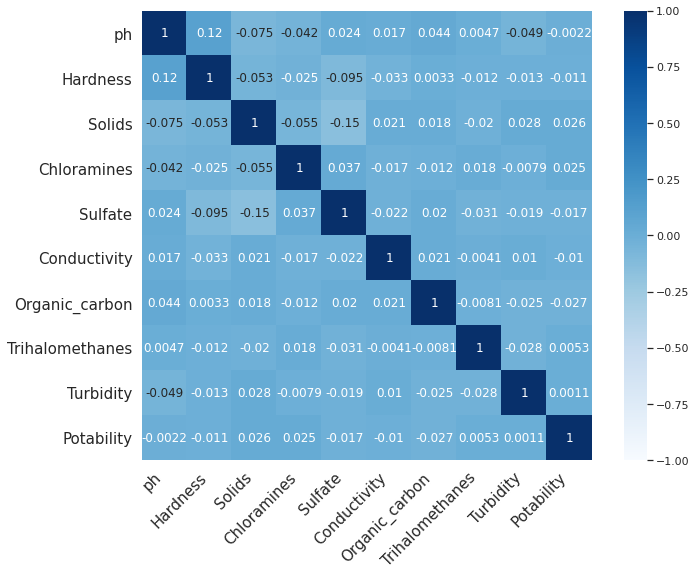

In [11]:
#we plot the correlation with the spearman correlation
#we can see that there is no strong correlation -> therefore we need to use all features for the following analysis.
plot_corr(df.corr('spearman'))

In [12]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## Dataset quality
- Missing values 

In [13]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [14]:
print("Total NaN: {}".format(df.isna().sum().sum()))

Total NaN: 1434


- Feature's distribution analysis

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



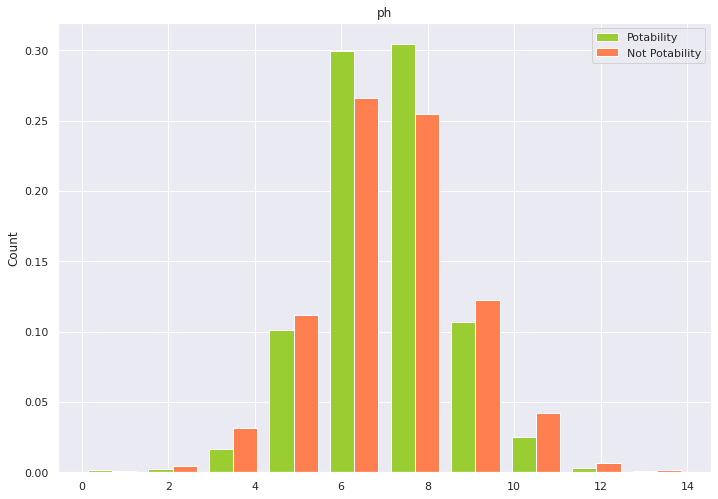

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



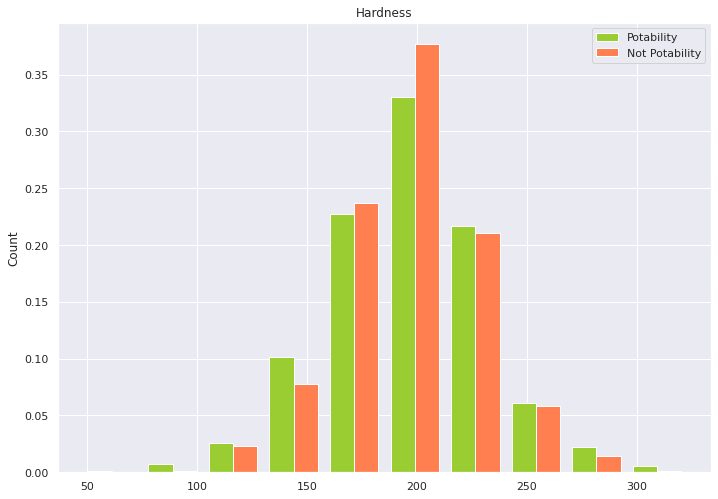

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



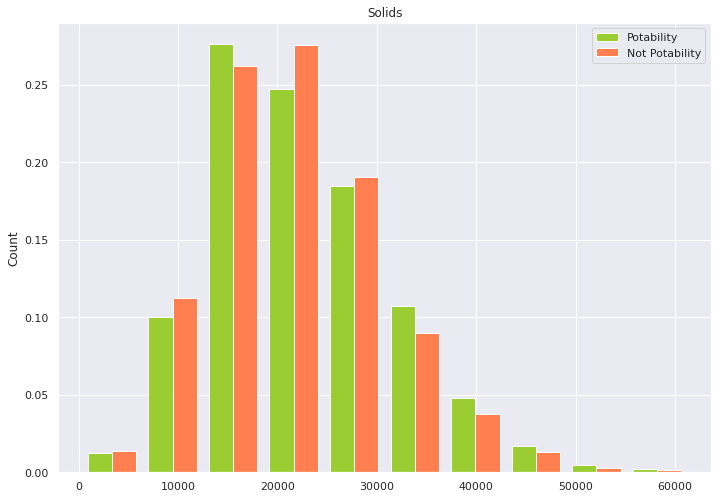

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



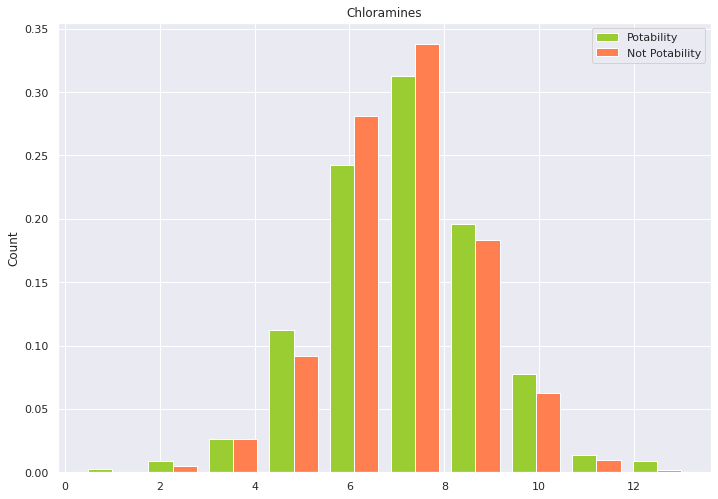

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



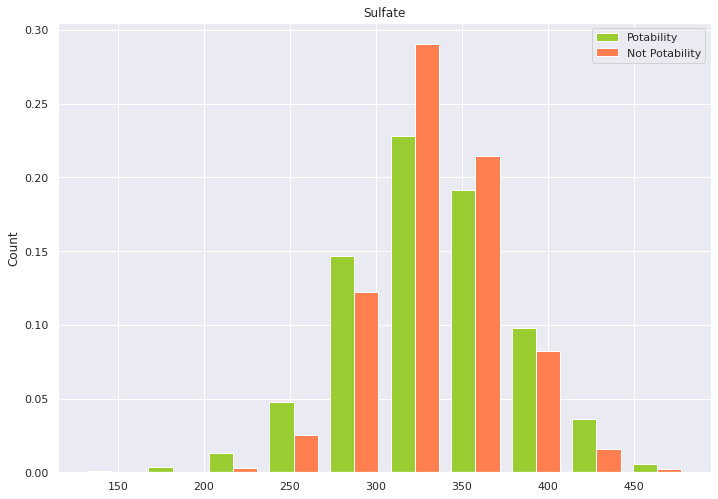

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



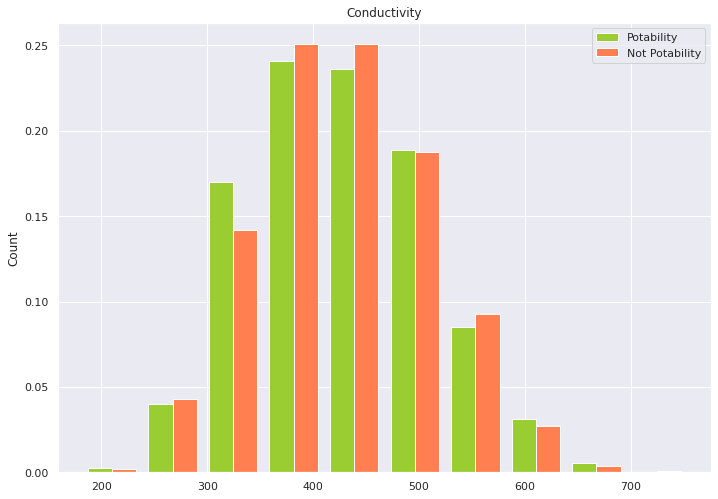

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



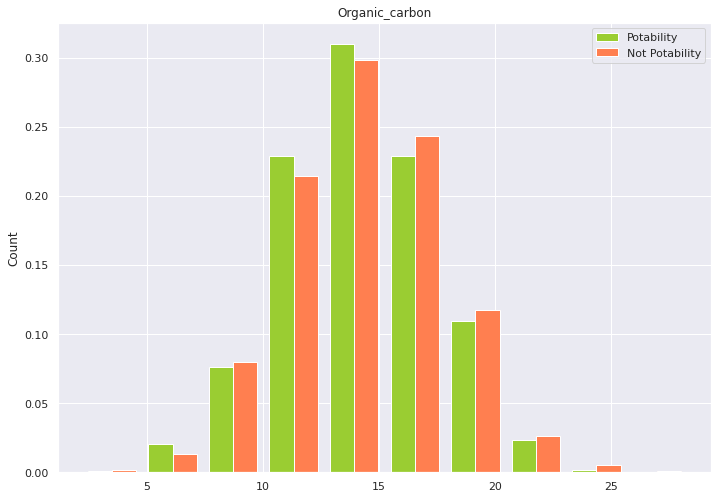

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



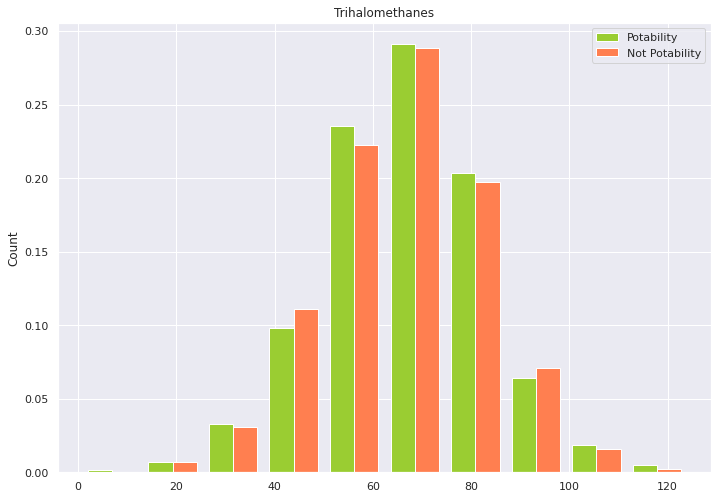

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



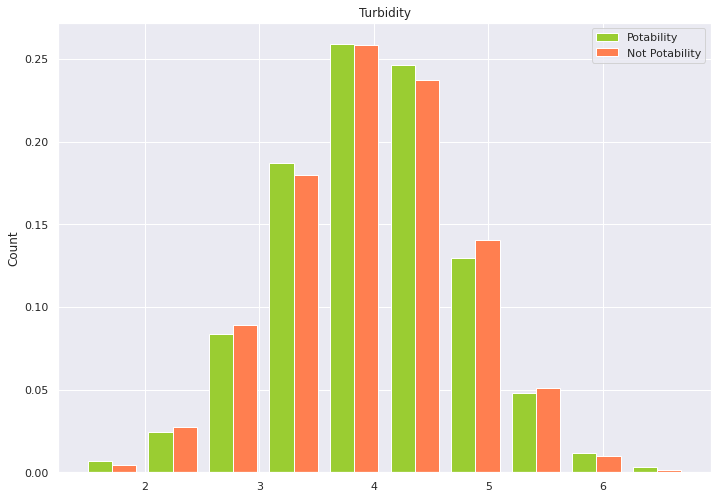

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



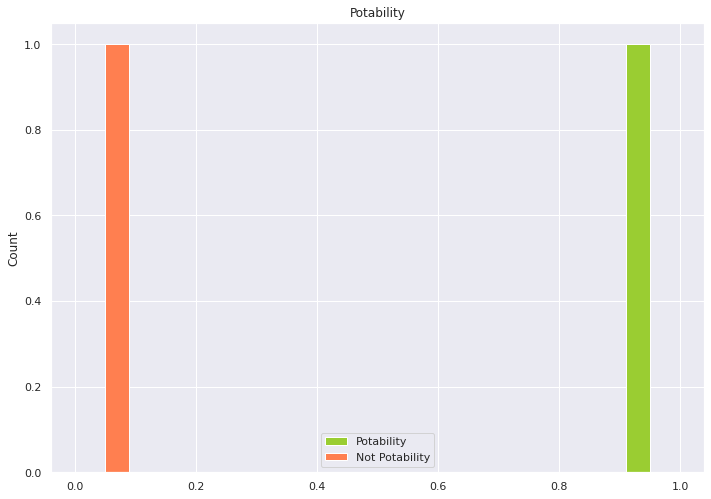

In [15]:
train_data = df
for col in train_data.columns:
  colors = ['yellowgreen','coral']
  col_fraud = train_data[train_data['Potability'] == 1][col]
  col_non_fraud = train_data[train_data['Potability'] == 0][col]
  col_fraud_w = np.empty(col_fraud.shape)
  col_fraud_w.fill(1/col_fraud.shape[0])
  col_non_fraud_w = np.empty(col_non_fraud.shape)
  col_non_fraud_w.fill(1/col_non_fraud.shape[0])
  fig, ax = plt.subplots()
  ax.hist([col_fraud, col_non_fraud], weights=[col_fraud_w, col_non_fraud_w], label=['Potability', 'Not Potability'], color = colors)
  ax.set_title(str(col)) 
  ax.set_ylabel("Count")
  plt.legend()
  plt.show()


## Data Preprocessing & Model Selection

In [116]:
def imput_nan_using_strategy(df, strategy):
  fill_NaN = SimpleImputer(missing_values=np.nan, strategy=strategy)
  imputed_DF = pd.DataFrame(fill_NaN.fit_transform(df), columns=df.columns)
  return imputed_DF

In [122]:
def experiment_single_model_imputing_with_method(df, method='mean'):
  df = imput_nan_using_strategy(df, method)

  df_train0 = df[df['Potability']==0].sample(n=1900, replace=False, random_state=42)
  df_train1 = df[df['Potability']==1].sample(n=1900, replace=True, random_state=42)

  df_train_sample = pd.concat([df_train1,df_train0], axis=0,ignore_index=True)
  X = df_train_sample.drop(['Potability'], axis=1)
  y = df_train_sample['Potability']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

  mod = []
  cv_score=[]
  model =[AdaBoostClassifier(), BaggingClassifier(), GradientBoostingClassifier(), DecisionTreeClassifier(), ExtraTreeClassifier(), KNeighborsClassifier(), RandomForestClassifier(), LogisticRegression()]

  for m in model:
      cv_score.append(cross_val_score(m, X_train, y_train, scoring='accuracy', cv=5,n_jobs=-1).mean())
      mod.append(m)
  model_df=pd.DataFrame(columns=['model','cv_score'])
  model_df['model']=mod
  model_df['cv_score']=cv_score
  return model_df.sort_values(by=['cv_score'], ascending=False).style.background_gradient(subset=['cv_score'])
  


### Impute null values. Method used: "Median"


In [127]:
experiment_single_model_imputing_with_method(df, 'median')

,model,cv_score
6,"RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None, criterion='gini', max_depth=None, max_features='auto', max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None, oob_score=False, random_state=None, verbose=0, warm_start=False)",0.777068
1,"BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False, random_state=None, verbose=0, warm_start=False)",0.753759
3,"DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini', max_depth=None, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, presort='deprecated', random_state=None, splitter='best')",0.716541
4,"ExtraTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini', max_depth=None, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, random_state=None, splitter='random')",0.702632
2,"GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None, learning_rate=0.1, loss='deviance', max_depth=3, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100, n_iter_no_change=None, presort='deprecated', random_state=None, subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0, warm_start=False)",0.655263
0,"AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0, n_estimators=50, random_state=None)",0.592481
5,"KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=None, n_neighbors=5, p=2, weights='uniform')",0.580827
7,"LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, max_iter=100, multi_class='auto', n_jobs=None, penalty='l2', random_state=None, solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)",0.515789


### Impute null values. Method used: "Mean"


In [128]:
experiment_single_model_imputing_with_method(df, 'mean')

,model,cv_score
6,"RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None, criterion='gini', max_depth=None, max_features='auto', max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None, oob_score=False, random_state=None, verbose=0, warm_start=False)",0.774436
1,"BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False, random_state=None, verbose=0, warm_start=False)",0.752256
3,"DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini', max_depth=None, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, presort='deprecated', random_state=None, splitter='best')",0.717293
4,"ExtraTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini', max_depth=None, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, random_state=None, splitter='random')",0.686842
2,"GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None, learning_rate=0.1, loss='deviance', max_depth=3, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100, n_iter_no_change=None, presort='deprecated', random_state=None, subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0, warm_start=False)",0.660150
0,"AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0, n_estimators=50, random_state=None)",0.592857
5,"KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=None, n_neighbors=5, p=2, weights='uniform')",0.581203
7,"LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, max_iter=100, multi_class='auto', n_jobs=None, penalty='l2', random_state=None, solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)",0.516541


### Impute null values. Method used: "Most frequent"


In [129]:
experiment_single_model_imputing_with_method(df, 'most_frequent')

,model,cv_score
6,"RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None, criterion='gini', max_depth=None, max_features='auto', max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None, oob_score=False, random_state=None, verbose=0, warm_start=False)",0.771053
1,"BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False, random_state=None, verbose=0, warm_start=False)",0.742105
3,"DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini', max_depth=None, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, presort='deprecated', random_state=None, splitter='best')",0.684211
4,"ExtraTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini', max_depth=None, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, random_state=None, splitter='random')",0.668045
2,"GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None, learning_rate=0.1, loss='deviance', max_depth=3, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100, n_iter_no_change=None, presort='deprecated', random_state=None, subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0, warm_start=False)",0.662030
0,"AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0, n_estimators=50, random_state=None)",0.594361
5,"KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=None, n_neighbors=5, p=2, weights='uniform')",0.587970
7,"LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, max_iter=100, multi_class='auto', n_jobs=None, penalty='l2', random_state=None, solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)",0.524060


### Impute null values. Method used: "Replaced with zero"


In [52]:
imputed_DF = df.replace(np.nan, 0)
experiment_single_model_imputing_with_method(imputed_DF)

,model,cv_score
6,"RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None, criterion='gini', max_depth=None, max_features='auto', max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None, oob_score=False, random_state=None, verbose=0, warm_start=False)",0.777068
1,"BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False, random_state=None, verbose=0, warm_start=False)",0.749624
4,"ExtraTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini', max_depth=None, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, random_state=None, splitter='random')",0.688722
3,"DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini', max_depth=None, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, presort='deprecated', random_state=None, splitter='best')",0.683459
2,"GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None, learning_rate=0.1, loss='deviance', max_depth=3, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100, n_iter_no_change=None, presort='deprecated', random_state=None, subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0, warm_start=False)",0.662030
0,"AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0, n_estimators=50, random_state=None)",0.594361
5,"KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=None, n_neighbors=5, p=2, weights='uniform')",0.586090
7,"LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, max_iter=100, multi_class='auto', n_jobs=None, penalty='l2', random_state=None, solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)",0.534962


### Imputing Missing Values Experiment Conclusion

We conclude:

1.  Even though there is no strong evidence to choose an imputation strategy, in general mean and median methods have higher scores considering all different models.
2.   RandomForestClassifier & BaggingClassifier were the best models according to its scores. We decided to consider both of them in the next ensamble model.
3.  Although GradientBoosting is not include in the top three models, because it does not belong to tree model's family, we also opted to consider this one in the final ensamble model.

## Dropping features

### Dataset balance 
Since it is a very unbalanced dataset, we will experiment with undersampling and oversampling techniques using the models RandomForestClassifier & BaggingClassifier, in order to select one of them.

In [53]:
imputed_DF = imput_nan_using_strategy(df,'mean')
train_data = imputed_DF

Useful functions to experiment

In [58]:
def experiment_sample_size(model, sample_size_range):
  sample_exp_scores = []
  sample_exp_scores_median = []

  for sample_n in sample_size_range:

    df_train0 = train_data[train_data['Potability']==0].sample(n=sample_n, replace=False, random_state=42)
    df_train1 = train_data[train_data['Potability']==1].sample(n=sample_n, replace=True, random_state=42)

    df_train_sample = pd.concat([df_train1,df_train0], axis=0,ignore_index=True)
    X = df_train_sample.iloc[:,:-1]
    y = df_train_sample.iloc[:,-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    pipeline = Pipeline([('clf', model())])

    scores = cross_val_score(pipeline, X_train, y_train, cv=5)

    sample_exp_scores.append(np.mean(scores))
    sample_exp_scores_median.append(np.median(scores))

  return sample_exp_scores

In [59]:
def plot_sample_size_experiment(model, start, end, step, title):
  sampling_size_range = [n for n in range(start, end, step)]
  sample_exp_scores = experiment_sample_size(model, sampling_size_range)
  ax = sns.scatterplot(sampling_size_range, sample_exp_scores)
  ax.set_title(title) 
  ax.set_ylabel("Score")
  ax.set_xlabel("Sampling Size")

First: RandomForestClassifier()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



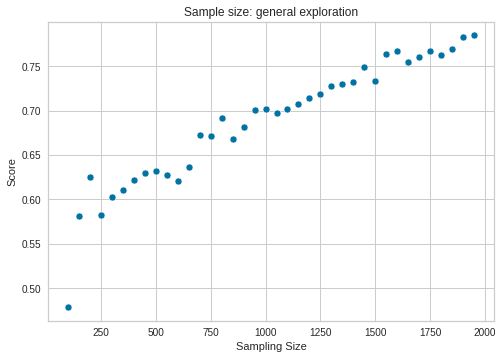

In [61]:
plot_sample_size_experiment(RandomForestClassifier, 100, 2000, 50, "Sample size: general exploration")

Second: BaggingClassifier()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



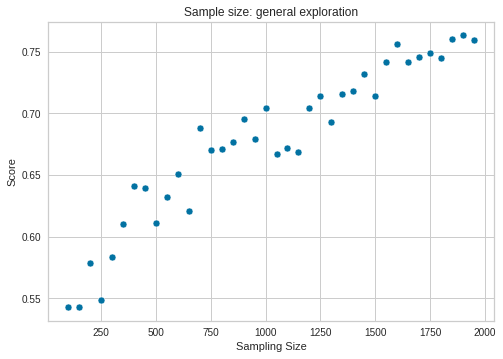

In [63]:
plot_sample_size_experiment(BaggingClassifier, 100, 2000, 50, "Sample size: general exploration")

Third: GradientBoostingClassifier()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



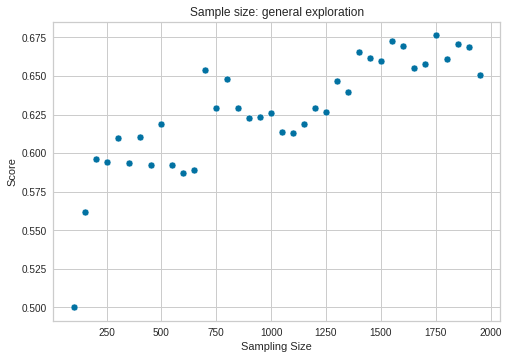

In [132]:
plot_sample_size_experiment(GradientBoostingClassifier, 100, 2000, 50, "Sample size: general exploration")

### Dropping Experimentation
We analyse the feature importance by dropping each column and considering its impact in model's score.

In [85]:
def experiment_drop_column_with_oversampling(model, sample_n, columns_to_drop = []):
  sample_exp_scores = []
  
  for column_to_drop in columns_to_drop:

    train_dataset_exp = train_data.drop(column_to_drop, axis=1)

    df_train0 = train_dataset_exp[train_dataset_exp['Potability']==0].sample(n=sample_n, replace=False, random_state=1)
    df_train1 = train_dataset_exp[train_dataset_exp['Potability']==1].sample(n=sample_n, replace=True, random_state=1)

    df_train_sample = pd.concat([df_train1,df_train0], axis=0,ignore_index=True)
    X = df_train_sample.iloc[:,:-1]
    y = df_train_sample.iloc[:,-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    pipeline = Pipeline([('clf', model())])
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)

    sample_exp_scores.append(np.mean(scores))

  return sample_exp_scores

In [96]:
def experiment_drop_column_without_oversampling(model, columns_to_drop):
  sample_exp_scores = []
  
  columns_to_drop = train_data.columns.to_list()
  columns_to_drop.remove('Potability')

  for column_to_drop in columns_to_drop:

    train_dataset_exp = train_data.drop(column_to_drop, axis=1)

    X = train_dataset_exp.iloc[:,:-1]
    y = train_dataset_exp.iloc[:,-1]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    pipeline = Pipeline([('clf', model())])
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)

    sample_exp_scores.append(np.mean(scores))

  return sample_exp_scores

In [108]:
def run_experiment_all_col(model, oversample = False, n_sample=1200):
  
  train_dataset_exp = train_data

  X = train_dataset_exp.iloc[:,:-1]
  y = train_dataset_exp.iloc[:,-1]

  if oversample:
    df_train0 = train_dataset_exp[train_dataset_exp['Potability']==0].sample(n=n_sample, replace=False, random_state=1)
    df_train1 = train_dataset_exp[train_dataset_exp['Potability']==1].sample(n=n_sample, replace=True, random_state=1)

    df_train_sample = pd.concat([df_train1,df_train0], axis=0,ignore_index=True)
    X = df_train_sample.iloc[:,:-1]
    y = df_train_sample.iloc[:,-1]

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

  pipeline = Pipeline([('clf', model())])
  scores = cross_val_score(pipeline, X_train, y_train, cv=5)

  return np.mean(scores)

In [87]:
  columns_to_drop = train_data.columns.to_list()
  columns_to_drop.remove('Potability')

#### Dropping & Oversampling

First: RandomForestClassifier()

In [111]:
scores_for_different_columns_subsets = experiment_drop_column_with_oversampling(RandomForestClassifier, 1900, columns_to_drop)
pd.DataFrame({'feature': columns_to_drop, 'score without feature': scores_for_different_columns_subsets}).sort_values(by='score without feature')

,feature,score without feature
4,Sulfate,0.741353
0,ph,0.753759
2,Solids,0.767293
1,Hardness,0.769173
7,Trihalomethanes,0.775188
3,Chloramines,0.775564
8,Turbidity,0.776692
6,Organic_carbon,0.779699
5,Conductivity,0.790226


In [112]:
run_experiment_all_col(RandomForestClassifier, oversample=True, n_sample=1900)

0.7842105263157896

Second: BaggingClassifier()

In [91]:
scores_for_different_columns_subsets = experiment_drop_column_with_oversampling(BaggingClassifier, 1200, columns_to_drop)
pd.DataFrame({'feature': columns_to_drop, 'score without feature': scores_for_different_columns_subsets}).sort_values(by='score without feature')

,feature,score without feature
4,Sulfate,0.626190
0,ph,0.653571
6,Organic_carbon,0.663095
5,Conductivity,0.664286
2,Solids,0.666071
7,Trihalomethanes,0.676190
1,Hardness,0.680952
8,Turbidity,0.682143
3,Chloramines,0.698810


In [109]:
run_experiment_all_col(BaggingClassifier, oversample=True, n_sample=1200)

0.7071428571428571

Third: Gradient Boosting 

In [204]:
scores_for_different_columns_subsets = experiment_drop_column_with_oversampling(GradientBoostingClassifier, 1200, columns_to_drop)
pd.DataFrame({'feature': columns_to_drop, 'score without feature': scores_for_different_columns_subsets}).sort_values(by='score without feature')

,feature,score without feature
0,ph,0.592262
4,Sulfate,0.612500
1,Hardness,0.624405
2,Solids,0.625000
5,Conductivity,0.630357
6,Organic_carbon,0.631548
7,Trihalomethanes,0.634524
3,Chloramines,0.639286
8,Turbidity,0.647619


In [205]:
run_experiment_all_col(GradientBoostingClassifier, oversample=True, n_sample=1200)

0.6363095238095238

#### Dropping & Original Sample

In [92]:
scores_for_different_columns_subsets = experiment_drop_column_without_oversampling(RandomForestClassifier, columns_to_drop)
pd.DataFrame({'feature': columns_to_drop, 'score without feature': scores_for_different_columns_subsets}).sort_values(by='score without feature')

,feature,score without feature
4,Sulfate,0.621464
0,ph,0.628002
3,Chloramines,0.645434
1,Hardness,0.651982
7,Trihalomethanes,0.655471
2,Solids,0.657201
8,Turbidity,0.662881
6,Organic_carbon,0.663744
5,Conductivity,0.665052


In [101]:
run_experiment_all_col(RandomForestClassifier)

0.6833680585286032

In [77]:
scores_for_different_columns_subsets = experiment_drop_column_without_oversampling(BaggingClassifier, columns_to_drop)
columns_to_drop = train_data.columns.to_list()
columns_to_drop.remove('Potability')
pd.DataFrame({'feature': columns_to_drop, 'score without feature': scores_for_different_columns_subsets}).sort_values(by='score without feature')

,feature,score without feature
4,Sulfate,0.599659
0,ph,0.604433
1,Hardness,0.620137
3,Chloramines,0.638026
2,Solids,0.638445
7,Trihalomethanes,0.641951
6,Organic_carbon,0.645880
5,Conductivity,0.646319
8,Turbidity,0.653273


In [102]:
run_experiment_all_col(BaggingClassifier)

0.6480463510003711

In [208]:
scores_for_different_columns_subsets = experiment_drop_column_without_oversampling(GradientBoostingClassifier, columns_to_drop)
columns_to_drop = train_data.columns.to_list()
columns_to_drop.remove('Potability')
pd.DataFrame({'feature': columns_to_drop, 'score without feature': scores_for_different_columns_subsets}).sort_values(by='score without feature')

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: at least one array or dtype is required




,feature,score without feature
5,Conductivity,0.583947
4,Sulfate,0.584386
6,Organic_carbon,0.586127
3,Chloramines,0.596165
2,Solids,0.599214
7,Trihalomethanes,0.604005
1,Hardness,0.607063
0,ph,0.625379
8,Turbidity,NaN


In [209]:
run_experiment_all_col(GradientBoostingClassifier)

0.6375850291596503

#### Dropping Experiment Conclusion

From dropping analysis, we can state that:

- Dropping & Oversampling
  - Random Forest: 
    - Training score using all features: 0.78
    - Dropping Conductivity column increases score by 0.01 
  - Bagging: 
    - Training score using all features: 0.71
    - Dropping any column decreases score
  - Gradient Boosting
    - Training score using all features: 0.64
    - Dropping Turbidity column increases score by 0.01

- Dropping & Original Sampling
  - Random Forest
    - Training score using all features: 0.68
    - Dropping any column decreases score
  - Bagging
    - Training score using all features: 0.65
    - Dropping Turbidity column increases score by 0.01
  - Gradient Boosting
    - Training score using all features: 0.64
    - Dropping any column decreases score

According to these results, we can conclude that there is no significant evidence to affirm that dropping any columns increases model score. Thus we decide to use all feature in the final model. 

We also decided to use original sampling instead of oversampling, even though when analysing training score we get a higher values, after testing it we realized than it was a bit worse than just taking the original dataset.    

### Feature Importance (for RandomForest & GradientBoosting)

In [131]:
df = pd.read_csv(train_dataset_file_path)
imputed_DF = imput_nan_using_strategy(df, 'mean')
X = imputed_DF.drop(['Potability'], axis=1)
y = imputed_DF['Potability']

In [164]:
def get_feature_importance_for_model(X, y, model):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
  pipeline = model()
  pipeline.fit(X_train,y_train)
  df_importance = pd.DataFrame({'importance':pipeline.feature_importances_, 'feature':X.columns})
  return df_importance

def plot_feature_importance(df_importance, title):
  ax = sns.scatterplot(data=df_importance, x = 'feature', y = 'importance', s=200)

  ax.set_xticklabels(
    X.columns,
    rotation=45,
    size = 15,
    horizontalalignment='right'
  );

  ax.set_ylabel( "Importance" , size = 18 )
  ax.set_xlabel( "Feature" , size = 18 )
  ax.set_title(title, size = 25)
  importance_mean = df_importance['importance'].mean()
  ax.axhline(y=importance_mean, color='red', linewidth=2)

  ax.set(ylim=(0, 0.5))


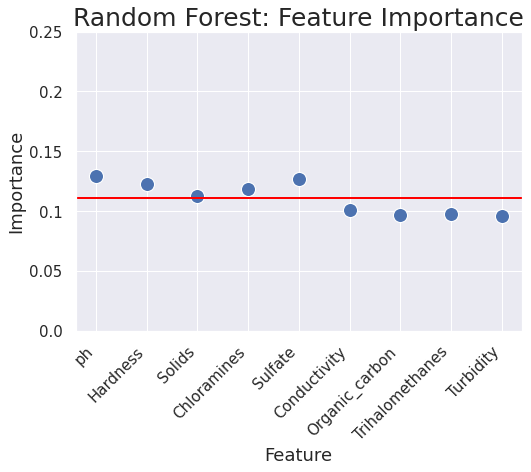

In [157]:
plot_feature_importance(get_feature_importance_for_model(X,y, RandomForestClassifier), "Random Forest: Feature Importance")

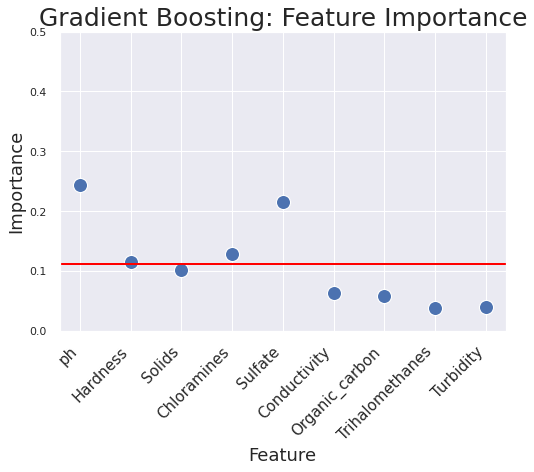

In [165]:
plot_feature_importance(get_feature_importance_for_model(X,y, GradientBoostingClassifier), "Gradient Boosting: Feature Importance")

## Final Model: Ensambling best single models

Single models to ensamble: 

- Random Forest
- Bagging
- Gradient Boosting

Before we will optimize Random Forest & Gradient Boosting.

### Grid Search



In [195]:
df = pd.read_csv(train_dataset_file_path)
imputed_DF = imput_nan_using_strategy(df, 'mean')
X = imputed_DF.drop(['Potability'], axis=1)
y = imputed_DF['Potability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#### Random Forest

In [223]:
clf.parameters = {'n_estimators': [50,100,150], 
              'max_depth': [None, 3,6,10,15,20],
              'min_samples_leaf':[None, 2,4,7,10],
              'criterion': ['gini','entropy],
              }
clf = GridSearchCV(RandomForestClassifier(), parameters)
clf.fit(X_train, y_train)
clf.best_estimator_

#### Gradient Boosting

In [ ]:
clf.parameters = {'n_estimators': [50,100,150], 
              'learning_rate': [0.01,0.025,0.05, 0.075,0.75,0.2],
              'max_depth':[None, 20],
              'max_features': [5,6,7,8],
              }
clf = GridSearchCV(GradientBoostingClassifier(), parameters)
clf.fit(X_train, y_train)
clf.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=20,
                           max_features=5, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=150,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

#### Bagging

In [ ]:
parameters = {"base_estimator__max_depth": [5, 10, 20], #1, 2, 3, 4, 
          "base_estimator__min_samples_leaf": [1, 3, 5, 7, 10],
          "base_estimator__min_samples_split": [2, 5, 7],
          'max_samples': [0.5, 0.7, 1.0], #0.05, 0.1, 0.2,
          'n_estimators': [2, 5, 10, 20],
}
clf = GridSearchCV(BaggingClassifier(), parameters)
clf.fit(X_train, y_train)
clf.best_estimator_

### Final Model: using optimized hyperparameters

In [222]:
clf1 = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.075, loss='deviance', max_depth=20,
                           max_features=5, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

clf2 = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=7,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)


clf4 = BaggingClassifier()
    

clf = VotingClassifier(estimators=[('rf', clf2), ('bg', clf3), ('gb', clf1)], voting='hard')

pipeline = Pipeline([('scl', StandardScaler()) ,('clf',  clf)])
pipeline.fit(X_train, y_train)

y_ensamble_pred = pipeline.predict(X_test)

#### Analysis of Final Model Performance

In [220]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def print_confusion_matrix(y_test, y_pred):
  cf_matrix = confusion_matrix(y_test, y_pred)
  group_names = ['True negative \n`Non potable`', 'False negative:\n Refused `Non-potable`', 'False positive:\n Refused `Potable`', 'True positive `Potable`']
  group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  accuracy  = np.trace(cf_matrix) / float(np.sum(cf_matrix))
  precision = cf_matrix[1,1] / sum(cf_matrix[:,1])
  recall    = cf_matrix[1,1] / sum(cf_matrix[1,:])
  f1_score  = 2*precision*recall / (precision + recall)
  sns.heatmap(cf_matrix, annot=labels, fmt='', cmap="Blues")
  stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={}".format(accuracy, precision, recall, f1_score)
  plt.ylabel('True label')
  plt.xlabel('Predicted label' + stats_text)


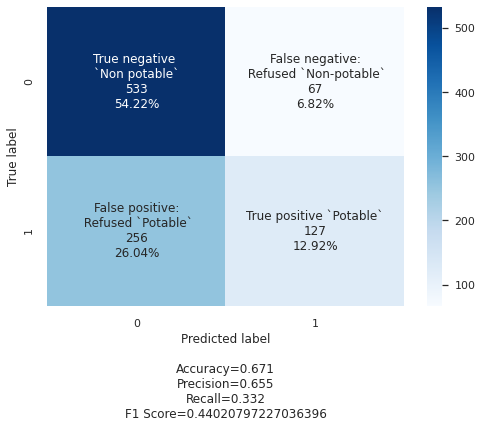

In [221]:
print_confusion_matrix(y_test, y_ensamble_pred)